In [1]:
from typing import Any,Dict,Tuple

import matplotlib.pyplot as plt
from torchmeta.datasets.helpers import omniglot
from torchmeta.utils.data import BatchMetaDataLoader

In [16]:
def get_loader(config:Dict[str,Any])-> Tuple[BatchMetaDataLoader,BatchMetaDataLoader,BatchMetaDataLoader]:
    train_dataset = omniglot(
        folder = config["folder_name"],
        shots=config["num_shots"],
        ways=config["num_ways"],
        shuffle=True,
        meta_train=True,
        download=config["download"],
    )
    train_dataloader = BatchMetaDataLoader(
        train_dataset,batch_size=config["batch_size"],shuffle=True,num_workers=1
    )
    
    val_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        ways=config["num_ways"],
        shuffle=True,
        meta_val=True,
        download=config["download"],
    )
    val_dataloader = BatchMetaDataLoader(
        val_dataset,batch_size=config["batch_size"],shuffle=True,num_workers=1
    )
    test_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        ways=config["num_ways"],
        shuffle=True,
        meta_test=True,
        download=config["download"]
    )
    
    test_dataloader = BatchMetaDataLoader(
        test_dataset,batch_size=config["batch_size"],shuffle=True,num_workers=1
    )
    
    return train_dataloader,val_dataloader,test_dataloader
    
    

In [17]:
config = {
    "folder_name":"dataset",
    "download":True,
    "num_shots":2,
    "num_ways":5,
    "batch_size":3,
    "num_batches_train":6000,
    "num_batches_test":2000,
    "num_batches_val":100,
    "device":"cpu",
}

In [20]:
train_dataloader,val_dataloader,test_dataloader = get_loader(config)

In [21]:
for batch_idx, batch in enumerate(train_dataloader):
    if batch_idx >= config["num_batches_train"]:
        break
    
    support_xs = batch["train"][0].to(device=config["device"])#train이란 support set 의미
    support_ys = batch["train"][1].to(device=config["device"])#train이란 support set 의미
    query_xs = batch["test"][0].to(device=config["device"])
    query_ys = batch["test"][1].to(device=config["device"])
    
    print(
        f"support_x shape : {support_xs.shape}\n",
        f"support_y shape : {support_ys.shape}\n",
        f"query_x shape : {query_xs.shape}\n",
        f"query_y shape : {query_ys.shape}\n",
    )
    break

support_x shape : torch.Size([3, 10, 1, 28, 28])
 support_y shape : torch.Size([3, 10])
 query_x shape : torch.Size([3, 10, 1, 28, 28])
 query_y shape : torch.Size([3, 10])



In [23]:
for batch_idx, batch in enumerate(val_dataloader):
    if batch_idx >= config["num_batches_val"]:
        break
    
    valid_support_xs = batch["train"][0].to(device=config["device"])#train이란 support set 의미
    valid_support_ys = batch["train"][1].to(device=config["device"])#train이란 support set 의미
    valid_query_xs = batch["test"][0].to(device=config["device"])
    valid_query_ys = batch["test"][1].to(device=config["device"])
    
    print(
        f"support_x shape : {valid_support_xs.shape}\n",
        f"support_y shape : {valid_support_ys.shape}\n",
        f"query_x shape : {valid_query_xs.shape}\n",
        f"query_y shape : {valid_query_ys.shape}\n",
    )
    break

support_x shape : torch.Size([3, 10, 1, 28, 28])
 support_y shape : torch.Size([3, 10])
 query_x shape : torch.Size([3, 10, 1, 28, 28])
 query_y shape : torch.Size([3, 10])



In [24]:
for batch_idx, batch in enumerate(test_dataloader):
    if batch_idx >= config["num_batches_test"]:
        break
    
    test_support_xs = batch["train"][0].to(device=config["device"])#train이란 support set 의미
    test_support_ys = batch["train"][1].to(device=config["device"])#train이란 support set 의미
    test_query_xs = batch["test"][0].to(device=config["device"])
    test_query_ys = batch["test"][1].to(device=config["device"])
    
    print(
        f"support_x shape : {test_support_xs.shape}\n",
        f"support_y shape : {test_support_ys.shape}\n",
        f"query_x shape : {test_query_xs.shape}\n",
        f"query_y shape : {test_query_ys.shape}\n",
    )
    break

support_x shape : torch.Size([3, 10, 1, 28, 28])
 support_y shape : torch.Size([3, 10])
 query_x shape : torch.Size([3, 10, 1, 28, 28])
 query_y shape : torch.Size([3, 10])



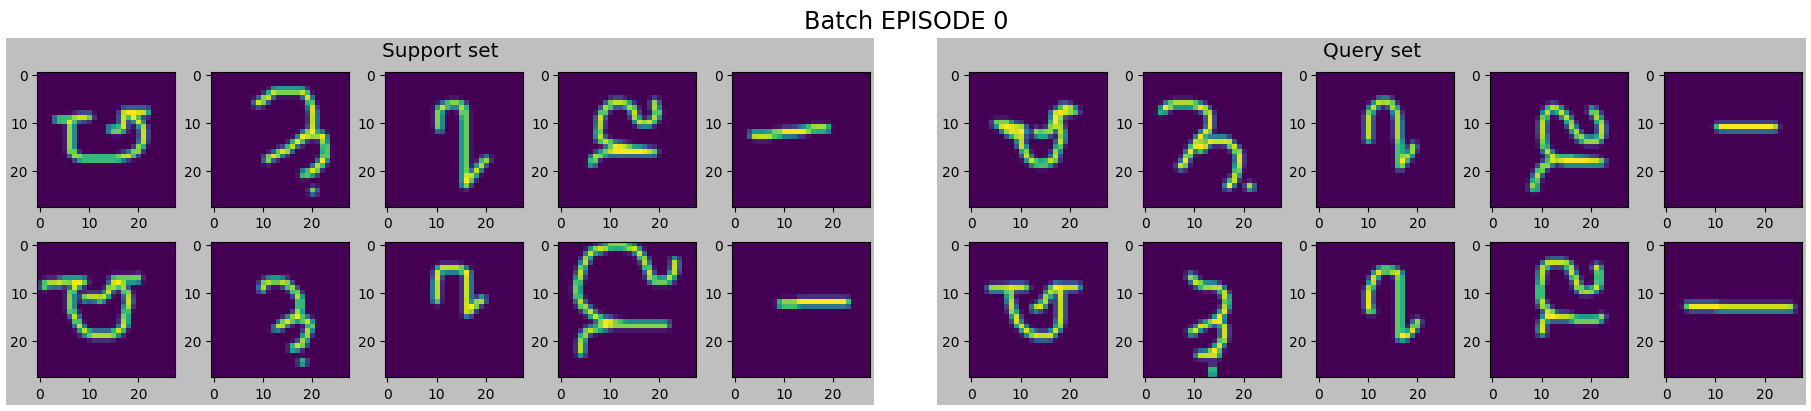

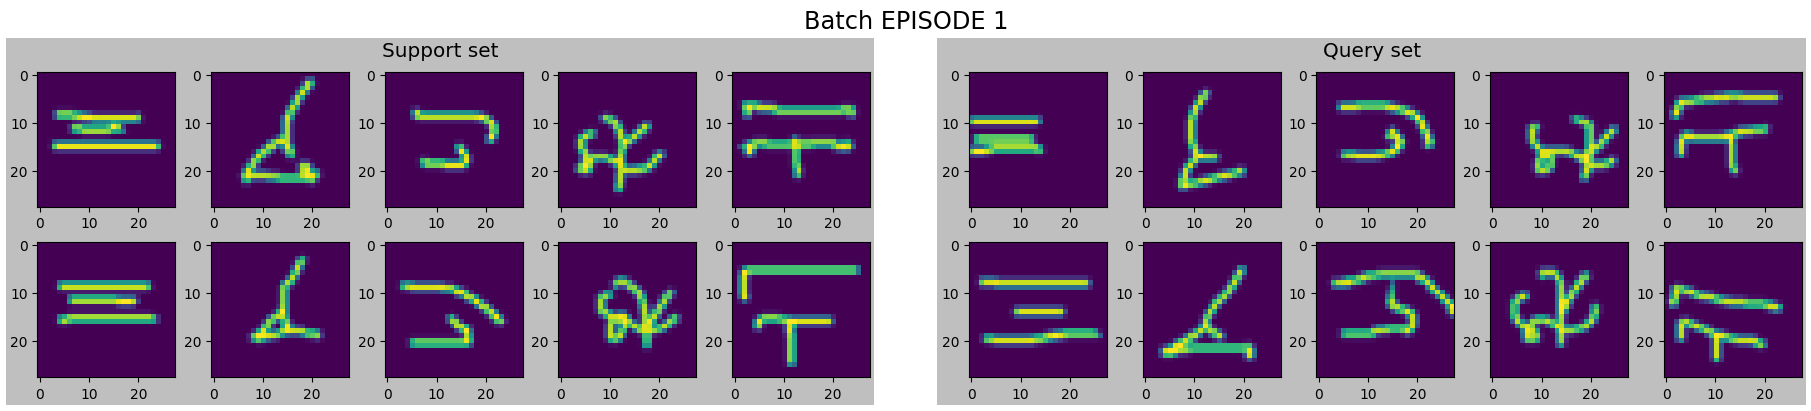

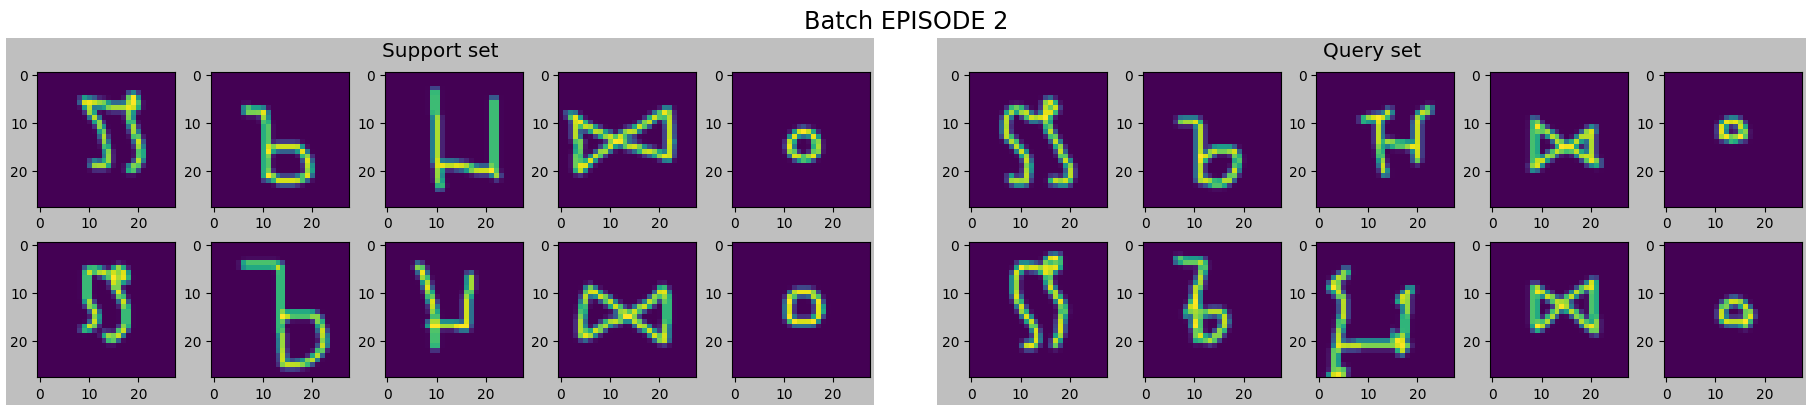

In [30]:
for b in range(config["batch_size"]):
    fig = plt.figure(constrained_layout=True,figsize=(18,4))
    subfigs = fig.subfigures(1,2,wspace=0.07)
    
    subfigs[0].set_facecolor("0.75")
    subfigs[0].suptitle("Support set",fontsize="x-large")
    support_axs = subfigs.flat[0].subplots(nrows=2,ncols=5)
    for i, ax in enumerate(support_axs.T.flatten()):
        ax.imshow(support_xs[b][i].permute(1,2,0).squeeze(),aspect="auto")
    
    subfigs[1].set_facecolor("0.75")
    subfigs[1].suptitle("Query set",fontsize="x-large")
    query_axes = subfigs.flat[1].subplots(nrows=2,ncols=5)
    for i,ax in enumerate(query_axes.T.flatten()):
        ax.imshow(query_xs[b][i].permute(1,2,0).squeeze(),aspect="auto")
    
    fig.suptitle("Batch EPISODE "+str(b),fontsize="xx-large")
    
    plt.show()
    

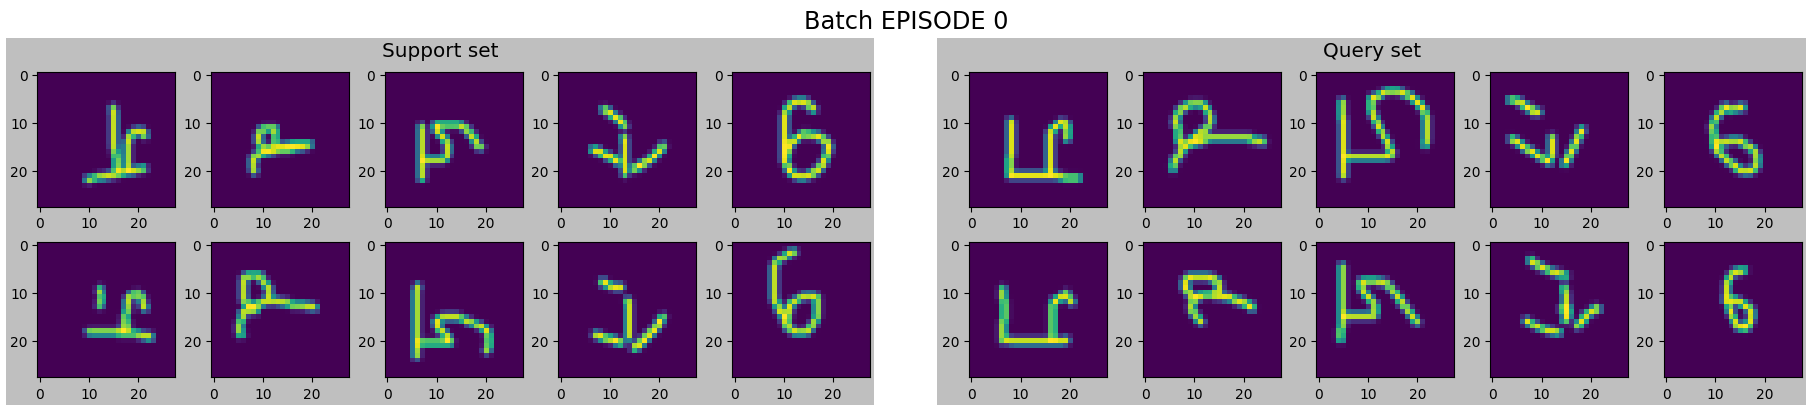

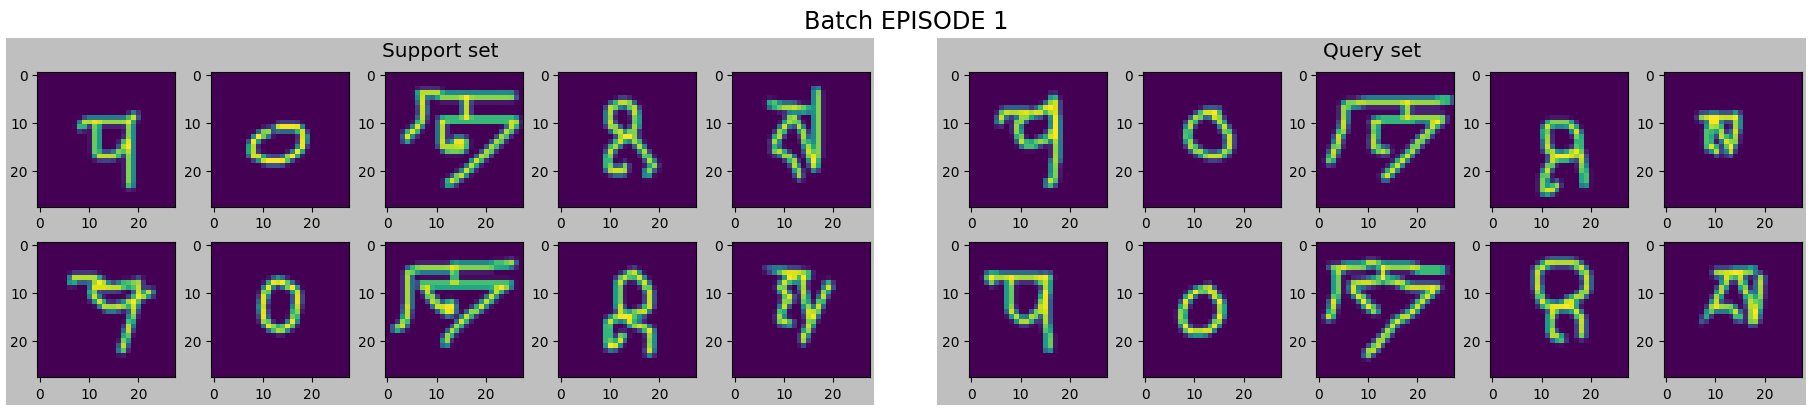

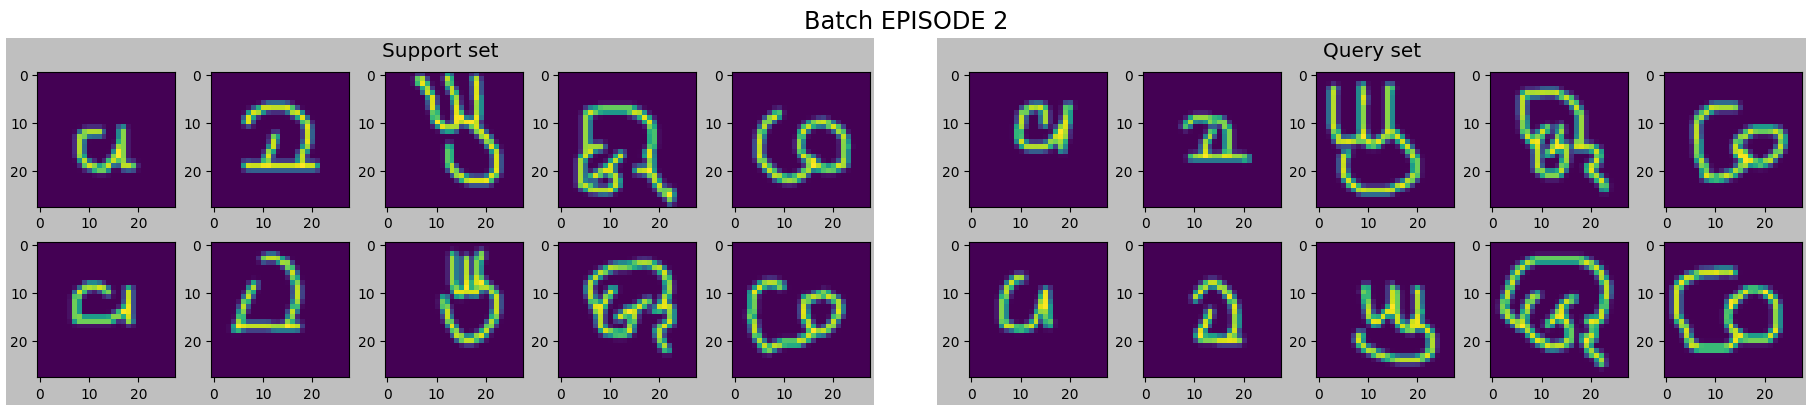

In [31]:
for b in range(config["batch_size"]):
    fig = plt.figure(constrained_layout=True,figsize=(18,4))
    subfigs = fig.subfigures(1,2,wspace=0.07)
    
    subfigs[0].set_facecolor("0.75")
    subfigs[0].suptitle("Support set",fontsize="x-large")
    support_axs = subfigs.flat[0].subplots(nrows=2,ncols=5)
    for i, ax in enumerate(support_axs.T.flatten()):
        ax.imshow(test_support_xs[b][i].permute(1,2,0).squeeze(),aspect="auto")
    
    subfigs[1].set_facecolor("0.75")
    subfigs[1].suptitle("Query set",fontsize="x-large")
    query_axes = subfigs.flat[1].subplots(nrows=2,ncols=5)
    for i,ax in enumerate(query_axes.T.flatten()):
        ax.imshow(test_query_xs[b][i].permute(1,2,0).squeeze(),aspect="auto")
    
    fig.suptitle("Batch EPISODE "+str(b),fontsize="xx-large")
    
    plt.show()
    